In [ ]:
#logistic function or Sigmoid Function usage.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [327]:
train = pd.read_csv('titanic_train.csv')
train.head()     

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# create a heat map to check for missing values
# train.isnull() here yellow color shows we are missing age and cabin values
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

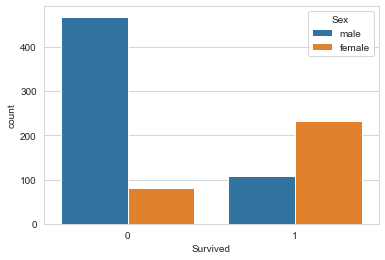

In [314]:
sns.countplot(x='Survived', hue = 'Sex', data = train) #0 meaning not survived

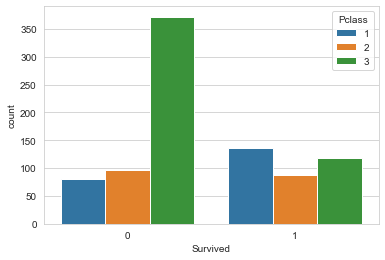

In [315]:
sns.countplot(x='Survived', hue = 'Pclass', data = train) #0 meaning not survived

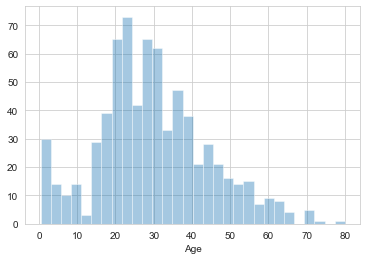

In [316]:
sns.distplot(train['Age'].dropna(), kde = False, bins = 30)
# train['Age'].plot.hist(bins=30)

In [ ]:
train.info()

In [ ]:
sns.countplot(x='SibSp', data = train)

In [ ]:
train['Fare'].hist(bins=40)

In [ ]:
# import cufflinks as cf
# cf.go_offline()
# train['Fare'].iplot(kind = 'hist')

In [ ]:
# data cleaning to replace misisng values with some informative data
sns.boxplot(x='Pclass',y ='Age', data = train)

In [317]:
# you can either predict age based on other features or simply put
# avg age by class
def impute_age(cols):
    Age = cols[0]
    Pclass =  cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 28
        else:
            return 24
    else:
        return Age
    


In [328]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis =1)

In [329]:
# since too much info is missing for cabin col, simply drop it or ignore it
train.drop('Cabin', axis = 1, inplace = True)

In [330]:
# train.dropna(inplace=True)

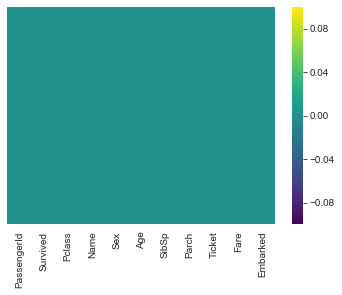

In [321]:
sns.heatmap(train.isnull(), yticklabels= False, cmap= 'viridis')

In [331]:
#dummy variables
sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies(train['Embarked'] , drop_first = True)
pclass = pd.get_dummies(train['Pclass'])

In [332]:
train = pd.concat([train, sex, embark, pclass], axis =1)

In [333]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,0,1


In [334]:
# For now drop all alphanumerical columns and keep only numeric data
train.drop(['Sex','Embarked','Name', 'Ticket','Pclass'], axis=1, inplace=True)

In [335]:
train.drop('PassengerId', axis =1, inplace=True)

In [336]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,1,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,0,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,0,1


In [ ]:
# Do actual classification

In [337]:
y = train['Survived']
x = train.drop('Survived', axis =1)
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [338]:
from sklearn.model_selection import train_test_split

In [339]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state=101)

In [340]:
x_test

,Age,SibSp,Parch,Fare,male,Q,S,1,2,3
511,24.0,0,0,8.05,1,0,1,0,0,1
613,24.0,0,0,7.75,1,1,0,0,0,1
615,24.0,1,2,65.00,0,0,1,0,1,0
337,41.0,0,0,134.50,0,0,0,1,0,0
718,24.0,0,0,15.50,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
792,24.0,8,2,69.55,0,0,1,0,0,1
828,24.0,0,0,7.75,1,1,0,0,0,1
732,28.0,0,0,0.00,1,0,1,0,1,0
669,37.0,1,0,52.00,0,0,1,1,0,0


In [341]:
from sklearn.linear_model import LogisticRegression

In [342]:
logmodel = LogisticRegression()

In [343]:
logmodel.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [344]:
predictions = logmodel.predict(x_test)
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [345]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [365]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



In [347]:
confusion_matrix(y_test, predictions)

array([[149,  14],
       [ 33,  71]], dtype=int64)

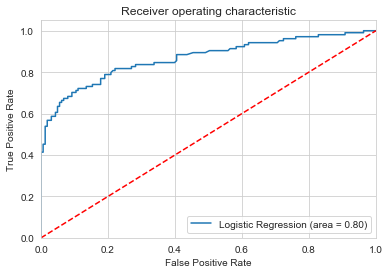

In [368]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
# lets try testing it with the actual testdata

In [348]:
test = pd.read_csv('titanic_test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#let clean the data and replce the categorical values

In [349]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [350]:
test['Age'] = test[['Age','Pclass']].apply(impute_age, axis =1)
# train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis =1)
test.loc[test['Fare'].isnull(), 'Fare'] = 0.0

In [351]:
test.drop('Cabin', axis = 1, inplace = True)
# test.dropna(inplace=True)

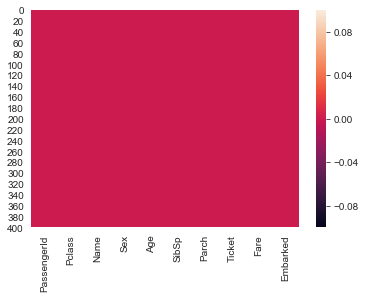

In [352]:
sns.heatmap(test.isnull())

In [354]:
sex_t = pd.get_dummies(test['Sex'] , drop_first = True)
embark_t = pd.get_dummies(test['Embarked'] , drop_first = True)
pclass = pd.get_dummies(test['Pclass'])

In [355]:
test = pd.concat([test, sex_t, embark_t, pclass], axis = 1)

In [356]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,1,2,3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,0,1


In [357]:
PassengerId = test['PassengerId']
test.drop(['Sex','PassengerId','Embarked','Name', 'Ticket','Pclass'], axis=1, inplace=True)

In [358]:
# No need to split the data now as we have test data and y data.
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Age      418 non-null float64
SibSp    418 non-null int64
Parch    418 non-null int64
Fare     418 non-null float64
male     418 non-null uint8
Q        418 non-null uint8
S        418 non-null uint8
1        418 non-null uint8
2        418 non-null uint8
3        418 non-null uint8
dtypes: float64(2), int64(2), uint8(6)
memory usage: 15.6 KB


In [359]:
test_predictions = logmodel.predict(test)

In [360]:
len(test_predictions)

418

In [361]:
final_data = pd.DataFrame({'PassengerId' : PassengerId, 'Survived' : test_predictions})
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.7 KB


In [362]:
final_data.to_csv('D:\\git_work\\git_repos\\data_analysis_and_visualization\\titanic_data_predictions.csv', index=False, columns = ['PassengerId','Survived'])

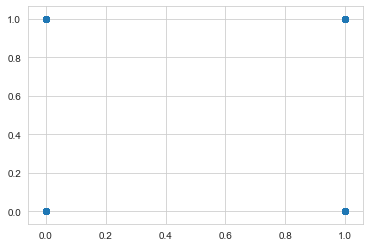

In [364]:
plt.scatter(test['male'],test_predictions)

In [2]:
# check these examples
# https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy

NameError: name 'train' is not defined